In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA

In [2]:
train_dataset = pd.read_csv(r'C:\Users\hp\Desktop\Decision Tree (CODE)\train.csv') 
print(train_dataset.head(10)) 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [3]:
test_dataset = pd.read_csv(r'C:\Users\hp\Desktop\Decision Tree (CODE)\test.csv')
print(test_dataset.head(11))

    PassengerId  Pclass                                          Name     Sex  \
0           892       3                              Kelly, Mr. James    male   
1           893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2           894       2                     Myles, Mr. Thomas Francis    male   
3           895       3                              Wirz, Mr. Albert    male   
4           896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5           897       3                    Svensson, Mr. Johan Cervin    male   
6           898       3                          Connolly, Miss. Kate  female   
7           899       2                  Caldwell, Mr. Albert Francis    male   
8           900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9           901       3                       Davies, Mr. John Samuel    male   
10          902       3                              Ilieff, Mr. Ylio    male   

     Age  SibSp  Parch     

In [4]:
#fill missing value in the training dataset
#calculate the median for Age column and fill missing value
train_dataset['Age'].fillna(train_dataset['Age'].median(), inplace=True)
#calculate the mode for Embarked column and fill missing value
train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0], inplace=True)
#Then print the first 8 rows
print(train_dataset.head(8))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  28.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    mal

In [5]:
#fill missing value in the test dataset
#calculate the median for Age column and fill missing value
test_dataset['Age'].fillna(test_dataset['Age'].median(), inplace=True)
#calculate the median for Fare column and fill missing value
test_dataset['Fare'].fillna(test_dataset['Fare'].median(), inplace=True)
#Then print the first 11 rows
print(test_dataset.head(11))

    PassengerId  Pclass                                          Name     Sex  \
0           892       3                              Kelly, Mr. James    male   
1           893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2           894       2                     Myles, Mr. Thomas Francis    male   
3           895       3                              Wirz, Mr. Albert    male   
4           896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5           897       3                    Svensson, Mr. Johan Cervin    male   
6           898       3                          Connolly, Miss. Kate  female   
7           899       2                  Caldwell, Mr. Albert Francis    male   
8           900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9           901       3                       Davies, Mr. John Samuel    male   
10          902       3                              Ilieff, Mr. Ylio    male   

     Age  SibSp  Parch     

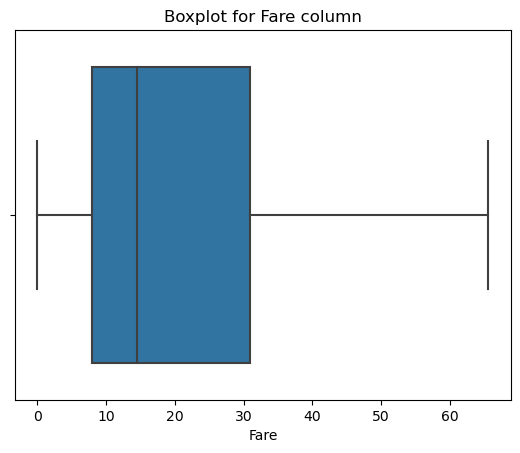

In [6]:
#HANDLING OUTLIERS 
# Calculate the IQR (Interquartile Range) for Fare column 
Q1 = train_dataset['Fare'].quantile(0.25) # find the 1st quartile (25%)
Q3 = train_dataset['Fare'].quantile(0.75) #find the 3rd quartile (75%)
IQR = Q3 - Q1

# Define outlier boundaries 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers in Fare column
train_dataset['Fare'] = train_dataset['Fare'].clip(lower_bound, upper_bound)
test_dataset['Fare'] = test_dataset['Fare'].clip(lower_bound, upper_bound)

#boxplot for fare column after handling outliers
sns.boxplot(x=train_dataset['Fare'])
plt.title("Boxplot for Fare column")
plt.show()

In [7]:
#convert from categorical data to numerical value for test
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_dataset['Sex'] = le.fit_transform(test_dataset['Sex'])
test_dataset['Embarked'] = le.fit_transform(test_dataset['Embarked'])
print(test_dataset.head())

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  
0  34.5      0      0   330911   7.8292   NaN         1  
1  47.0      1      0   363272   7.0000   NaN         2  
2  62.0      0      0   240276   9.6875   NaN         1  
3  27.0      0      0   315154   8.6625   NaN         2  
4  22.0      1      1  3101298  12.2875   NaN         2  


In [8]:
#convert from categorical data to numerical value for train
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_dataset['Sex'] = le.fit_transform(train_dataset['Sex'])
train_dataset['Embarked'] = le.fit_transform(train_dataset['Embarked'])
print(train_dataset.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  65.6344   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4            373450   8.0500   NaN         2  


In [9]:
#Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_dataset[['Age', 'Fare']] = scaler.fit_transform(train_dataset[['Age', 'Fare']])
print(train_dataset[['Age', 'Fare']].head())

        Age      Fare
0  0.271174  0.110460
1  0.472229  1.000000
2  0.321438  0.120745
3  0.434531  0.809027
4  0.434531  0.122649


In [10]:
X = train_dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']] #independent variable
Y = train_dataset['Survived']  # dependent  variable
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.271174,1,0,0.110460,2
1,1,0,0.472229,1,0,1.000000,0
2,3,0,0.321438,0,0,0.120745,2
3,1,0,0.434531,1,0,0.809027,2
4,3,1,0.434531,0,0,0.122649,2


In [11]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
#Apply PCA for Train dataset
pca = PCA(n_components=2)  #Reduce to 2 components for visualization
X_pca = pca.fit_transform(train_dataset[['Age', 'Fare']])  # Apply PCA for Age and Fare column
print("variance ratio PC1, PC2:", pca.explained_variance_ratio_) #Then get variance ratio for PC1 and PC2

variance ratio PC1, PC2: [0.79051065 0.20948935]


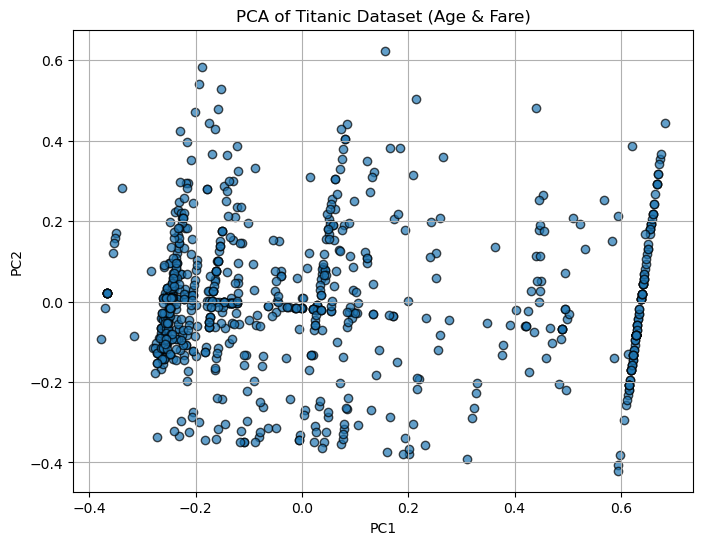

In [13]:
# Create a scatter plot of the 2 principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Titanic Dataset (Age & Fare)')
plt.grid(True)
plt.show()

In [14]:
#split data into train and valdation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_val shape: {Y_val.shape}")

X_train shape: (668, 7)
X_val shape: (223, 7)
Y_train shape: (668,)
Y_val shape: (223,)



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       134
           1       0.80      0.69      0.74        89

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223


Confusion Matrix:
[[119  15]
 [ 28  61]]

Accuracy Score:
Accuracy: 0.8071748878923767


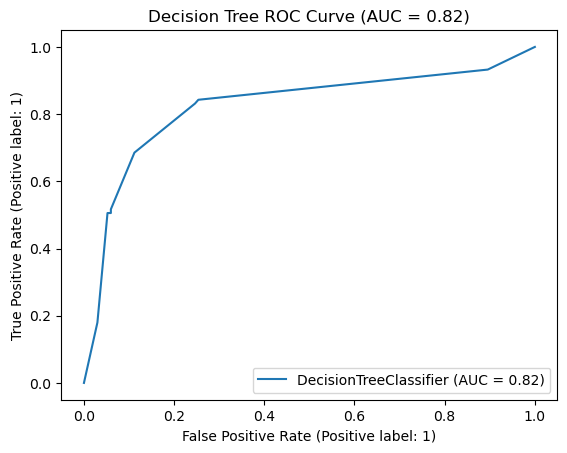

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Create the DecisionTreeClassifier with the default criterion (GINI Index)
classifier = DecisionTreeClassifier(max_depth=5, random_state=42)  
classifier.fit(X_train, Y_train)
# Predictions on validation data
y_pred = classifier.predict(X_val)
# Evaluation Metrics for DT
print("\nClassification Report:")
print(classification_report(Y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_val, y_pred))

print("\nAccuracy Score:")
print('Accuracy:', accuracy_score(Y_val, y_pred))

# ROC Curve for DT
y_pred_prob_dt = classifier.predict_proba(X_val)[:, 1]  # calculating the predicted Probabilities for survived / (+)class
roc_auc_dt = roc_auc_score(Y_val, y_pred_prob_dt) #calculate the AUC score
# Plot the ROC curve using the classifier
RocCurveDisplay.from_estimator(classifier, X_val, Y_val) 
#Added title for the graph with AUC score
plt.title(f"Decision Tree ROC Curve (AUC = {roc_auc_dt:.2f})")
plt.show()

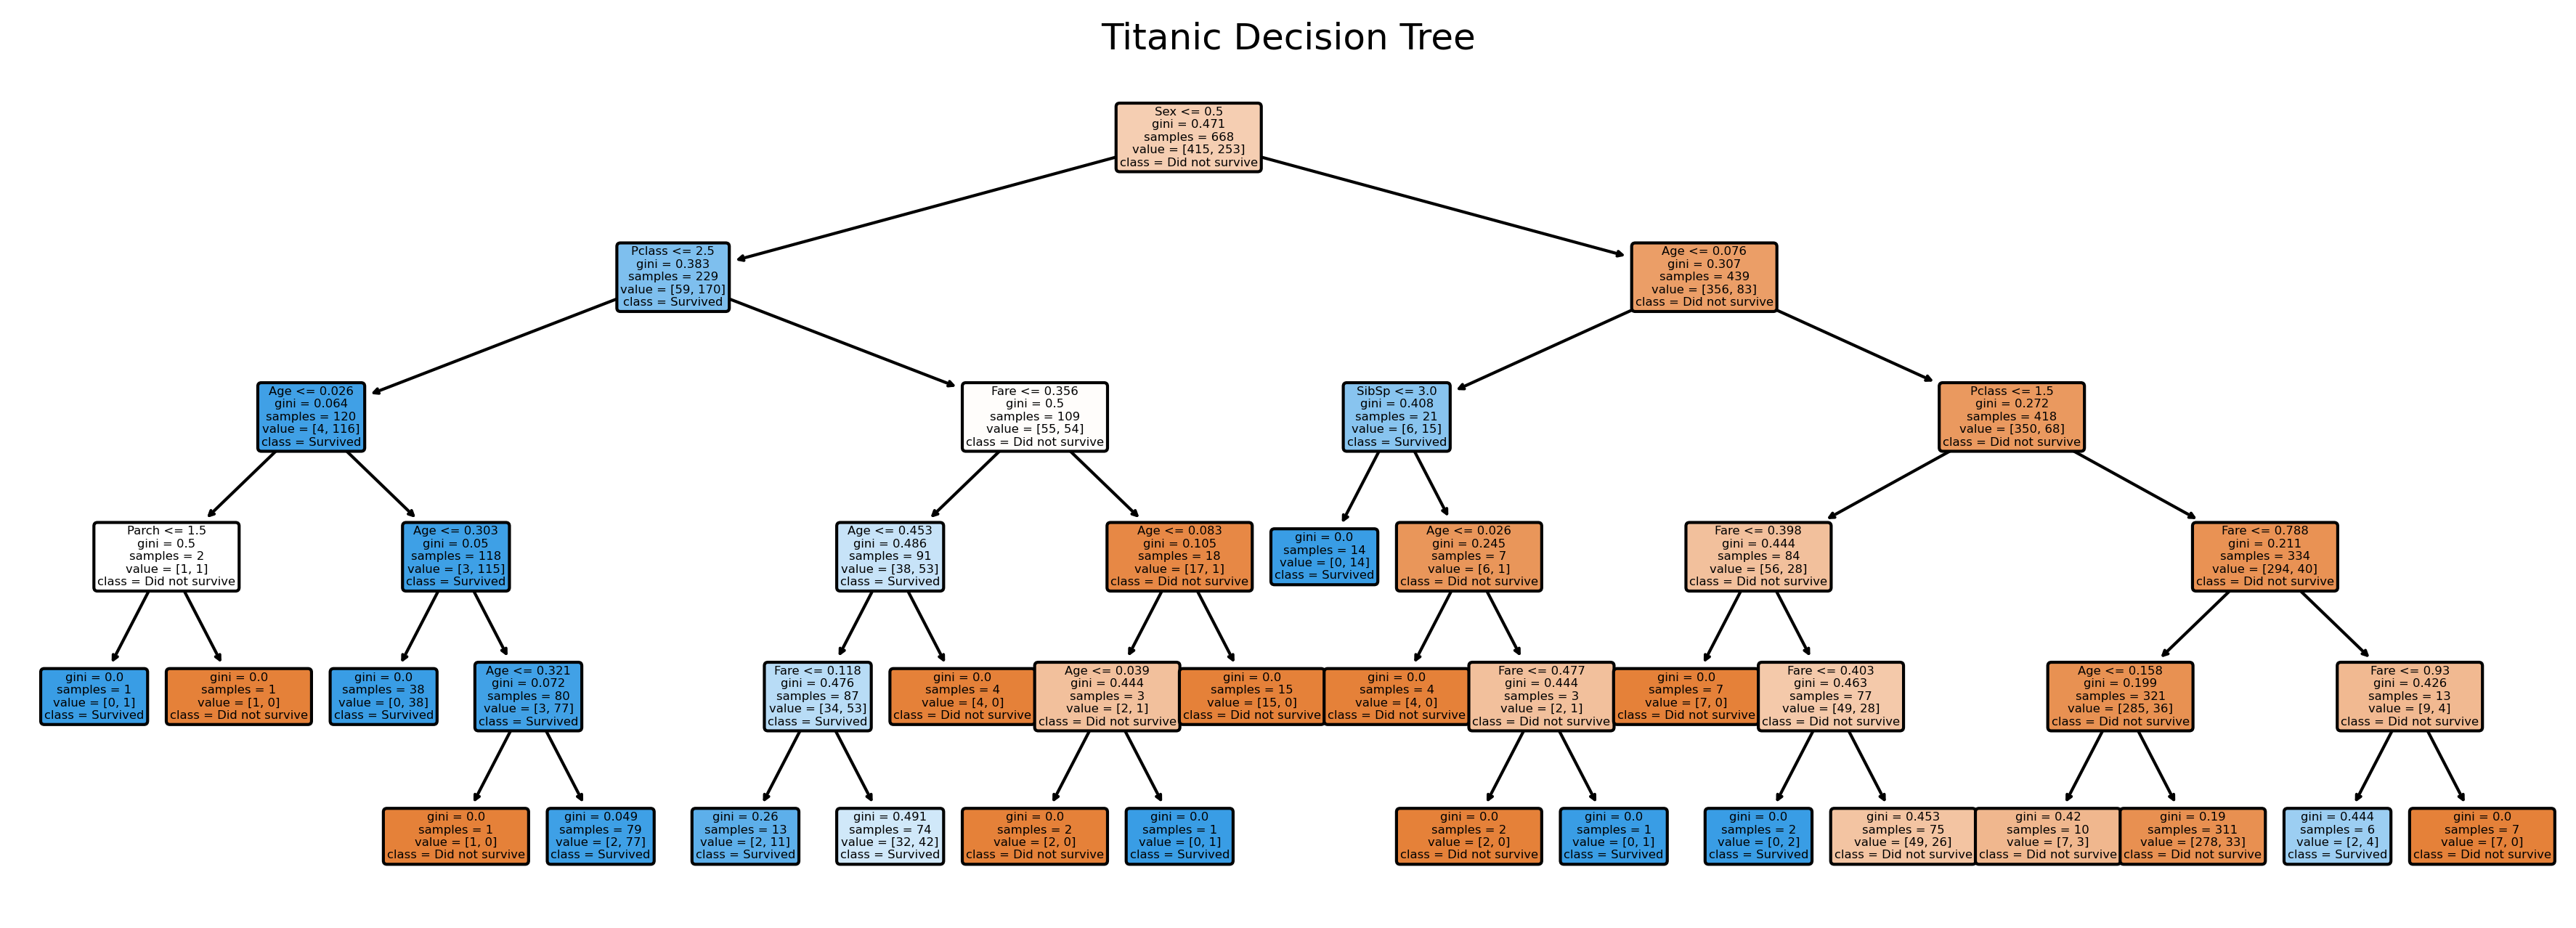

In [16]:
#print Decision Tree
plt.figure(figsize=(15, 5), dpi=300) #dpi is dots per inch, so used 300 for Very high resolution
plot_tree(classifier, 
          feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], 
          class_names=['Did not survive', 'Survived'], 
          filled=True, 
          rounded=True)
plt.title("Titanic Decision Tree")
plt.show()


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       134
           1       0.78      0.74      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223


Confusion Matrix for KNN:
[[115  19]
 [ 23  66]]

Accuracy Score for KNN:
Accuracy: 0.8116591928251121


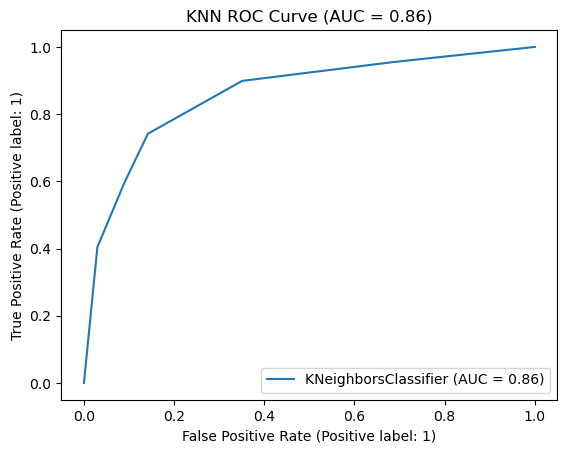

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay

# Create KNN classifier with k=5
classifier_KNN = KNeighborsClassifier(n_neighbors=5)
classifier_KNN.fit(X_train, Y_train)

# Predictions on validation data
y_pred_knn = classifier_KNN.predict(X_val)

# Evaluation Metrics for KNN
print("\nClassification Report for KNN:")
print(classification_report(Y_val, y_pred_knn))

print("\nConfusion Matrix for KNN:")
print(confusion_matrix(Y_val, y_pred_knn))

print("\nAccuracy Score for KNN:")
print('Accuracy:', accuracy_score(Y_val, y_pred_knn))

# ROC Curve for KNN
y_pred_prob_knn = classifier_KNN.predict_proba(X_val)[:, 1]  # calculating the predicted Probabilities for survived / (+)class
roc_auc_knn = roc_auc_score(Y_val, y_pred_prob_knn) #calculate the AUC score
# Plot the ROC curve using the KNN classifier
RocCurveDisplay.from_estimator(classifier_KNN, X_val, Y_val)
#Added title for the graph with AUC score
plt.title(f"KNN ROC Curve (AUC = {roc_auc_knn:.2f})")
plt.show()